In [1]:
%load_ext testmynb

# `-n` option

The `-n` option can be used to run the cell during the test, but not to treat it as a test. This can be used for cells which contain all the required import statements, or as a setup/teardown cell.

In [2]:
%%testcell imports -n
import pandas as pd
import numpy as np

# Why use *testmynb* ?

There are times when your tests need some documentation, but text comments alone are just not sufficient enough to fully explain what the test is doing. By using `testmynb`, you may use Jupyter Notebook's features to explain your tests.

Like the example below. Say deep in your Python package, you made a function which adds a label to a given x, y coordinate. You tried your best in the docstring what the function does, and you write the tests for the function which all passes.

In [3]:
%%testcell example_func -n
# Your function in your imaginary package.
def get_label(x: float, y: float) -> str:
    """
    Based on the given coordinate, returns `purple`, `red`, and/or `orange` label.
    
    `purple`: 0<=x<30 and 30<y<=100
    `red`: 20<=x<70 and 60<y<=100
    `orange`: 70<=x<=100 and 30<y<=100
    """
    assert 0 <= x <= 100
    assert 0 <= y <= 100
    
    labels = list()
    if (0 <= x < 30)\
        and (30 < y <= 100):
        labels.append('purple')
    if (20 <= x < 70)\
        and (60 < y <= 100):
        labels.append('red')
    if (70 <= x <= 100)\
        and (30 < y <= 100):
        labels.append('orange')
        
    return ';'.join(labels)

In [4]:
%%testcell test_get_label_original

# Tests for the above function that all passes
assert 'purple;red' == get_label(25, 70)
assert 'purple' == get_label(10, 70)
assert 'orange' == get_label(80, 50)
assert '' == get_label(20, 20)

Technically, this all passes and the function works as intended. But text only explanation of the function, and looking at the source itself just doesn't intuitively tell the reader what the function does. In this situation, a graphical explanation may aid in the reader to understand what the function/tests are doing. 

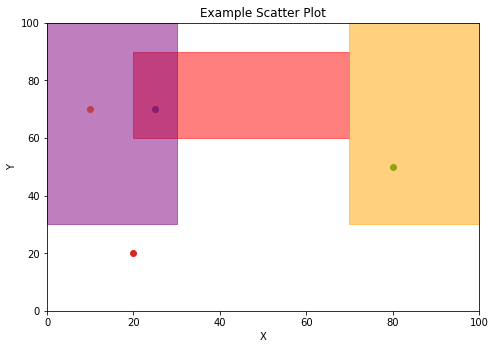

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
# ax.scatter(grades_range, girls_grades, color='r')
# ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Example Scatter Plot')

ax.set_ylim(0, 100)
ax.set_xlim(0, 100)

ax.axvspan(20, 70, ymin=.6, ymax=.9, alpha=0.5, color='red')
ax.axvspan(0, 30, ymin=.3, ymax=1.0, alpha=0.5, color='purple')
ax.axvspan(70, 100, ymin=.3, ymax=1., alpha=0.5, color='orange')

ax.scatter(25, 70) # This should output `purple;red`
assert 'purple;red' == get_label(25, 70)
ax.scatter(10, 70) # This should output `purple`
assert 'purple' == get_label(10, 70)
ax.scatter(80, 50) # This should output `orange`
assert 'orange' == get_label(80, 50)
ax.scatter(20, 20) # This should output ``
assert '' == get_label(20, 20)
plt.show()

The above graphically shows what the function does and intuitively shows what the tests are testing!  

Also, now we can graphically see what the function does, we can improve the tests with something like the `hypothesis` package!

In [6]:
%%testcell test_get_label_improved

from hypothesis import given, strategies

@given(
    x = strategies.integers(min_value = 0, max_value = 19)
    , y = strategies.integers(min_value = 31, max_value = 100)
)
def test_get_label_purple(x, y):
    assert 'purple' == get_label(x, y)
    
    
@given(
    x = strategies.integers(min_value = 30, max_value = 69)
    , y = strategies.integers(min_value = 61, max_value = 90)
)
def test_get_label_red(x, y):
    assert 'red' == get_label(x, y)
    
@given(
    x = strategies.integers(min_value = 70, max_value = 100)
    , y = strategies.integers(min_value = 31, max_value = 100)
)
def test_get_label_orange(x, y):
    assert 'orange' == get_label(x, y)